In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_wine, load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.cluster import KMeans

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier, RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, RocCurveDisplay

## Week 7 (PA)

In [119]:
text_data=['A metaverse is a network of 3D virtual worlds focused on social connection.',
           'In futurism and science fiction, the term is often described as a hypothetical iteration of the Internet as a single', 
           'universal virtual world that is facilitated by the use of virtual and augmented reality headsets.',
           'The term "metaverse" has its origins  the 1992 science fiction novel Snow Crash as a portmanteau of "meta" and "universe."',
           'Various metaverses have been developed for popular use such as virtual world platforms like Second Life.',
           'Some metaverse iterations involve integration between virtual and physical spaces and virtual economies',
           'often including a significant interest in advancing virtual reality technology.', 
           'The term has seen considerable use as a buzzword for public relations purposes to exaggerate development progress for various related technologies and projects.[10] Information privacy and user addiction are concerns within metaverses',
           'stemming from challenges facing the social media and video game industries as a whole.']

In [134]:
cvr = CountVectorizer()
y = cvr.fit_transform(text_data)
print(y.shape, type(y))

(9, 99) <class 'scipy.sparse.csr.csr_matrix'>


In [135]:
cvr = CountVectorizer(min_df=2)
y = cvr.fit_transform(text_data)
print(y.shape, type(y))

(9, 20) <class 'scipy.sparse.csr.csr_matrix'>


In [139]:
cvr = CountVectorizer()
y = cvr.fit_transform(text_data)
print(y.shape, type(y), cvr.vocabulary_["metaverse"])

(9, 99) <class 'scipy.sparse.csr.csr_matrix'> 51


In [150]:
Docs = ['This is the first question.', 'This document is the second document.', 'And this is the third one' ]

cvr = CountVectorizer(max_features=10)
y = cvr.fit_transform(text_data).toarray()
y = np.array(y)
print(y)
# print(y.shape, type(y))

[[0 0 0 1 1 1 0 0 0 1]
 [1 2 0 1 0 1 1 2 0 0]
 [1 0 0 1 0 1 0 1 1 2]
 [1 1 0 0 1 1 1 2 0 0]
 [0 1 1 0 0 0 0 0 1 1]
 [2 0 0 0 1 0 0 0 0 2]
 [0 0 0 0 0 0 0 0 0 1]
 [2 1 2 0 0 0 1 1 1 0]
 [1 1 0 0 0 0 0 1 0 0]]


In [151]:
x0 = np.array([1,0,0,0])
x = np.array([[1,0,0,0], [0,1,1,1], [1,2,0,0]])
p = 2

def distance(x, y, p):
      return ((x - y) ** p).sum() ** (1/p)

for row_idx in range(0,3):
      print(distance(x[row_idx], x0, p))

0.0
2.0
2.0


## Week 8 (PA)

In [107]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [108]:
sc = SVC(C=20, gamma="auto", random_state=42)
sc.fit(X_train, y_train)

print(sc.score(X_train, y_train))
print(sc.score(X_test, y_test))

0.9714285714285714
1.0


In [109]:
y_pred = sc.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [110]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svc', SVC(kernel='linear', decision_function_shape='ovr', C=1, class_weight=None))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC(C=1, kernel='linear'))])

In [111]:
y_pred1 = pipe.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [112]:
df = load_iris(as_frame=True)
df.data = df.data[df.target != 1]

X = df.data
y = df.target[df.target != 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50, 4) (50, 4) (50,) (50,)


In [113]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svc', SVC(kernel='linear', decision_function_shape='ovr', C=1, class_weight=None))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC(C=1, kernel='linear'))])

In [114]:
y_pred1 = pipe.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        20

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [115]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [117]:
lsc = LinearSVC(loss="hinge", random_state=42, penalty="l2")

lsc.fit(X_train, y_train)
print(sc.score(X_train, y_train))
print(sc.score(X_test, y_test))

0.9714285714285714
1.0


C:\Users\Vishvam\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [118]:
param_grid = {
    "kernel" : ['linear', 'rbf'],
    "C" : [5, 10, 100]
}

gsc = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid)
gsc.fit(X_train, y_train)
y_pred2 = gsc.predict(X_test)

print(accuracy_score(y_test, y_pred2))

0.9777777777777777


## Week 9 (PA)

In [42]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124, 13) (54, 13) (124,) (54,)


In [45]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.9444444444444444


In [48]:
dt.tree_.max_depth

6

In [54]:
dt1 = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=3, min_samples_split=4, min_impurity_decrease=0.1, random_state=1)

dt1.fit(X_train, y_train)

print(dt1.score(X_train, y_train))
print(dt1.score(X_test, y_test))

0.8145161290322581
0.7777777777777778


[Text(0.4444444444444444, 0.875, 'X[6] <= 1.867\nentropy = 1.562\nsamples = 124\nvalue = [36, 52, 36]'),
 Text(0.2222222222222222, 0.625, 'X[6] <= 0.701\nentropy = 0.971\nsamples = 60\nvalue = [0, 24, 36]'),
 Text(0.1111111111111111, 0.375, 'entropy = 0.0\nsamples = 21\nvalue = [0, 0, 21]'),
 Text(0.3333333333333333, 0.375, 'X[9] <= 3.5\nentropy = 0.961\nsamples = 39\nvalue = [0, 24, 15]'),
 Text(0.2222222222222222, 0.125, 'entropy = 0.0\nsamples = 19\nvalue = [0, 19, 0]'),
 Text(0.4444444444444444, 0.125, 'entropy = 0.811\nsamples = 20\nvalue = [0, 5, 15]'),
 Text(0.6666666666666666, 0.625, 'X[0] <= 12.575\nentropy = 0.989\nsamples = 64\nvalue = [36, 28, 0]'),
 Text(0.5555555555555556, 0.375, 'entropy = 0.0\nsamples = 22\nvalue = [0, 22, 0]'),
 Text(0.7777777777777778, 0.375, 'X[12] <= 756.5\nentropy = 0.592\nsamples = 42\nvalue = [36, 6, 0]'),
 Text(0.6666666666666666, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [1, 6, 0]'),
 Text(0.8888888888888888, 0.125, 'entropy = 0.0\nsamples 

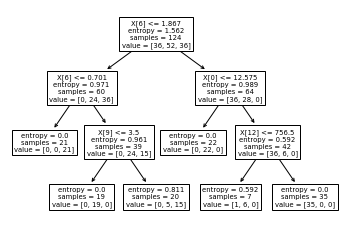

In [53]:
tree.plot_tree(dt1)

## Week 10 (PA)

In [36]:
X, y = load_wine(return_X_y=True)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124, 13) (54, 13) (124,) (54,)


In [22]:
ab = AdaBoostClassifier(random_state=1)
ab.fit(X_train, y_train)
print(ab.score(X_train, y_train))
print(ab.score(X_test, y_test))

0.6774193548387096
0.5370370370370371


In [30]:
param_grid = {
     "n_estimators" : [100,500,1000],
     "learning_rate" : [0.5,1,2]
}

gcv = GridSearchCV(estimator=ab, param_grid=param_grid, cv=4)
gcv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'learning_rate': [0.5, 1, 2],
                         'n_estimators': [100, 500, 1000]})

In [31]:
print(gcv.score(X_train, y_train))
print(gcv.score(X_test, y_test))

1.0
0.9629629629629629


In [32]:
gcv.best_estimator_

AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=1)

In [40]:
clf1 = GradientBoostingClassifier(random_state=1)
clf2 = BaggingClassifier(random_state=1)
clf3 = RandomForestClassifier(random_state=1)


vc = VotingClassifier([
    ('gbc', clf1),
    ('bg', clf2),
    ('rfc', clf3)
])

vc.fit(X_train, y_train)

VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(random_state=1)),
                             ('bg', BaggingClassifier(random_state=1)),
                             ('rfc', RandomForestClassifier(random_state=1))])

In [41]:
print(vc.score(X_train, y_train))
print(vc.score(X_test, y_test))

1.0
0.9814814814814815
